In [1]:
import pandas as pd
import numpy as np

In [2]:
part_d_df = pd.read_csv('data/part_d_2016.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2017.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24964300, 21)


In [3]:
part_d_df.head(2)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1104855030,MOREL,GUSTAVO,IRON MOUNTAIN,MI,Hematology,S,AZITHROMYCIN,AZITHROMYCIN,11.0,...,14.0,70,76.9,NaN,#,NaN,#,NaN,NaN,NaN
1,1306971445,FRIED,TOBI,SHAWNEE,OK,Family Practice,S,TAMSULOSIN HCL,TAMSULOSIN HCL,NaN,...,43.0,1290,419.4,NaN,*,16.0,NaN,32.0,960.0,290.26


In [4]:
exclusion_df.head(2)
len(exclusion_df)

678

In [5]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24548475, 16)


In [6]:
len(exclusion_df['NPI'].unique())

675

In [7]:
len(exclusion_df['SPECIALTY'].unique())

68

In [8]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

5415

In [9]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
882,1093755134,HUNTINGTON,IN,Internal Medicine,S,SIMVASTATIN,SIMVASTATIN,54.0,254,13892,2416.62,NaN,230.0,12663.0,2183.88,1
3503,1831202126,PHILA,PA,Internal Medicine,S,DIAZEPAM,DIAZEPAM,11.0,27,1086,300.67,NaN,NaN,NaN,NaN,1


In [10]:
# Top 20 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
nppes_provider_state,,,,,,,,,,,,,,,
CA,2380009,2380009,2380009,2380009,2380009,2380009,952300,2380009,2380009,2380009,350147,1404672,1404672,1404672,2380009
NY,1701773,1701773,1701773,1701773,1701773,1701773,631302,1701773,1701773,1701773,230654,1004652,1004652,1004652,1701773
FL,1661974,1661974,1661974,1661974,1661974,1661974,750825,1661974,1661974,1661974,245836,932996,932996,932996,1661974
TX,1534331,1534331,1534331,1534331,1534331,1534331,647366,1534331,1534331,1534331,203014,845597,845597,845597,1534331
PA,1265591,1265591,1265591,1265591,1265591,1265591,468451,1265591,1265591,1265591,167437,752524,752524,752524,1265591
OH,1034221,1034221,1034221,1034221,1034221,1034221,412928,1034221,1034221,1034221,146426,596411,596411,596411,1034221
NC,896563,896563,896563,896563,896563,896563,351434,896563,896563,896563,118906,508438,508438,508438,896563
IL,895524,895524,895524,895524,895524,895524,331277,895524,895524,895524,119608,527693,527693,527693,895524
MI,867603,867603,867603,867603,867603,867603,354924,867603,867603,867603,122194,467648,467648,467648,867603


In [11]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,24543060,24543060,24543060,24543060,24543060,24543060,24543060,9594208,24543060,24543060,24543060,3388531,14074344,14074344,14074344
1,5415,5415,5415,5415,5415,5415,5415,2012,5415,5415,5415,865,3148,3148,3148


In [12]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [13]:
len(part_d_df_exclusion['npi'].unique())

151

In [14]:
part_d_df_exclusion[['npi']].to_csv('2016_part_d_e_npi.csv')

In [15]:
len(part_d_df_exclusion['drug_name'].unique())

659

In [16]:
len(part_d_df_exclusion['specialty_description'].unique())

32

In [17]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'Otolaryngology', 'Pain Management',
       'Obstetrics & Gynecology', 'Endocrinology', 'Geriatric Medicine',
       'Obstetrics/Gynecology', 'Family Practice', 'Nurse Practitioner',
       'Anesthesiology', 'General Practice', 'Psychiatry',
       'Interventional Pain Management',
       'Cardiovascular Disease (Cardiology)', 'Emergency Medicine',
       'Infectious Disease', 'Neurology', 'Specialist', 'Podiatry',
       'Certified Clinical Nurse Specialist', 'Plastic Surgery',
       'Neurosurgery', 'Dentist', 'Physician Assistant', 'Dermatology',
       'Psychiatry & Neurology', 'Urology',
       'Physical Medicine and Rehabilitation', 'General Surgery',
       'Family Medicine', 'Vascular Surgery', 'Allergy/ Immunology'],
      dtype=object)

In [18]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,1457356768,348,348,348,348,348,348,179,348,348,348,77,258,258,258,348
1,1174545271,254,254,254,254,254,254,108,254,254,254,28,165,165,165,254
2,1346237096,238,238,238,238,238,238,108,238,238,238,36,143,143,143,238
3,1093755134,232,232,232,232,232,232,109,232,232,232,25,144,144,144,232
4,1215963715,193,193,193,193,193,193,74,193,193,193,26,117,117,117,193
5,1639275969,153,153,153,153,153,153,69,153,153,153,23,89,89,89,153
6,1952477622,148,148,148,148,148,148,63,148,148,148,14,76,76,76,148
7,1831202126,142,142,142,142,142,142,56,142,142,142,16,94,94,94,142
8,1225067044,138,138,138,138,138,138,46,138,138,138,7,74,74,74,138
9,1720060460,114,114,114,114,114,114,34,114,114,114,10,74,74,74,114


In [19]:
# Top 10 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:10]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

,nppes_provider_state,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,NY,794,794,794,794,794,794,261,794,794,794,135,450,450,450,794
1,MI,632,632,632,632,632,632,274,632,632,632,104,354,354,354,632
2,FL,409,409,409,409,409,409,143,409,409,409,49,226,226,226,409
3,NC,348,348,348,348,348,348,179,348,348,348,77,258,258,258,348
4,CA,338,338,338,338,338,338,92,338,338,338,57,197,197,197,338
5,VA,287,287,287,287,287,287,97,287,287,287,50,170,170,170,287
6,GA,272,272,272,272,272,272,135,272,272,272,50,164,164,164,272
7,NJ,270,270,270,270,270,270,84,270,270,270,37,147,147,147,270
8,PA,252,252,252,252,252,252,117,252,252,252,41,142,142,142,252
9,IL,243,243,243,243,243,243,80,243,243,243,26,147,147,147,243


In [20]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,2083,2083,2083,2083,2083,2083,841,2083,2083,2083,261,1227,1227,1227,2083
1,Family Practice,1485,1485,1485,1485,1485,1485,489,1485,1485,1485,176,843,843,843,1485
2,Psychiatry,320,320,320,320,320,320,115,320,320,320,71,210,210,210,320
3,Pain Management,300,300,300,300,300,300,106,300,300,300,107,188,188,188,300
4,Endocrinology,148,148,148,148,148,148,63,148,148,148,14,76,76,76,148
5,Nurse Practitioner,133,133,133,133,133,133,30,133,133,133,19,65,65,65,133
6,Anesthesiology,112,112,112,112,112,112,59,112,112,112,38,66,66,66,112
7,Infectious Disease,104,104,104,104,104,104,28,104,104,104,7,70,70,70,104
8,Obstetrics & Gynecology,76,76,76,76,76,76,49,76,76,76,19,39,39,39,76
9,Emergency Medicine,65,65,65,65,65,65,6,65,65,65,22,46,46,46,65


After full US dataset analysis, will use NJ data to do detailed analysis

In [21]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [22]:
len(part_d_df_small)

664190

In [23]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,663920,663920,663920,663920,663920,663920,663920,252017,663920,663920,663920,94778,397652,397652,397652
1,270,270,270,270,270,270,270,84,270,270,270,37,147,147,147


In [24]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Family Practice,144,144,144,144,144,144,49,144,144,144,17,70,70,70,144
1,Internal Medicine,75,75,75,75,75,75,14,75,75,75,3,48,48,48,75
2,Psychiatry,31,31,31,31,31,31,8,31,31,31,10,18,18,18,31
3,Obstetrics & Gynecology,20,20,20,20,20,20,13,20,20,20,7,11,11,11,20


In [25]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
prescriber_specialty_df.head()

,,total_claim_count,drug_count
npi,specialty_description,,
1003001678,Nurse Practitioner,12,1
1003002072,Urology,2064,24
1003002858,Nurse Practitioner,1825,42
1003011891,Gastroenterology,775,27
1003012410,Family Practice,719,33


In [27]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [28]:
prescriber_specialty_df.head()

,npi,specialty_description,total_claim_count,drug_count
0,1003001678,Nurse Practitioner,12,1
1,1003002072,Urology,2064,24
2,1003002858,Nurse Practitioner,1825,42
3,1003011891,Gastroenterology,775,27
4,1003012410,Family Practice,719,33


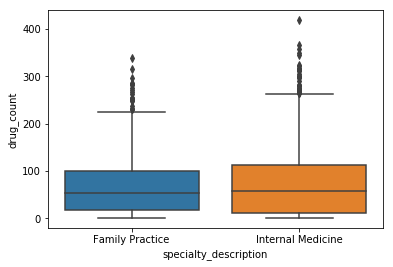

In [29]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [30]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [31]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [32]:
npi_generic_cross_df.head()

generic_name,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,ABATACEPT/MALTOSE,ABIRATERONE ACETATE,ACAMPROSATE CALCIUM,ACARBOSE,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
npi,,,,,,,,,,,,,,,,,,,,,
1003001678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003002072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003002858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003011891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003012410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [34]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1003001678,Nurse Practitioner,12,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003002072,Urology,2064,24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003002858,Nurse Practitioner,1825,42,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003011891,Gastroenterology,775,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003012410,Family Practice,719,33,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [36]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
10594,1437223161,Addiction Medicine,596,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
15493,1639295470,Addiction Medicine,88,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
159,1003878943,Allergy/ Immunology,56,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,1013941012,Allergy/ Immunology,494,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
758,1033116801,Allergy/ Immunology,321,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1437223161,Addiction Medicine,596,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
1,1639295470,Addiction Medicine,88,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003878943,Allergy/ Immunology,56,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1013941012,Allergy/ Immunology,494,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1033116801,Allergy/ Immunology,321,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
npi,,,,,,,,,,,,,,,
1245231406,81,81,81,81,81,81,20,81,81,81,6,43,43,43,81
1043215650,63,63,63,63,63,63,29,63,63,63,11,27,27,27,63
1497732994,61,61,61,61,61,61,12,61,61,61,3,39,39,39,61
1740380997,31,31,31,31,31,31,8,31,31,31,10,18,18,18,31
1801846597,20,20,20,20,20,20,13,20,20,20,7,11,11,11,20
1558478529,14,14,14,14,14,14,2,14,14,14,0,9,9,9,14


In [65]:
# Based on analyzed result, the interested excluded npi is 1245231406
# we need to find out the position of 1245231406 based on this script, the result is 6828
# update the position of the rest of the scripts using 6828
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1245231406]

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
6828,1245231406,Family Practice,2096,81,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0


In [40]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Cardiology']

In [66]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1245231406].head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
378766,1245231406,SADDLE BROOK,NJ,Family Practice,S,XANAX,ALPRAZOLAM,NaN,12,300,8551.86,NaN,NaN,NaN,NaN,1
1812668,1245231406,SADDLE BROOK,NJ,Family Practice,S,FINASTERIDE,FINASTERIDE,NaN,11,330,294.24,0.0,0.0,0.0,0.00,1
1945573,1245231406,SADDLE BROOK,NJ,Family Practice,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,12.0,18,134,137.15,NaN,NaN,NaN,NaN,1
2071221,1245231406,SADDLE BROOK,NJ,Family Practice,S,ALPRAZOLAM,ALPRAZOLAM,25.0,107,3406,916.82,NaN,63.0,1906.0,558.78,1
2411432,1245231406,SADDLE BROOK,NJ,Family Practice,S,BUTALBITAL-ACETAMINOPHEN-CAFFE,BUTALB/ACETAMINOPHEN/CAFFEINE,NaN,18,350,1810.52,0.0,0.0,0.0,0.00,1


Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [67]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [68]:
pf_matrix

array([[ 0.,  0.,  0., ..., 12.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [69]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [70]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [71]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'ABACAVIR SULFATE',
       'ABACAVIR SULFATE/LAMIVUDINE', 'ABACAVIR/DOLUTEGRAVIR/LAMIVUDI',
       'ABACAVIR/LAMIVUDINE/ZIDOVUDINE', 'ABATACEPT', 'ABATACEPT/MALTOSE',
       'ABIRATERONE ACETATE', 'ACAMPROSATE CALCIUM', 'ACARBOSE',
       ...
       'ZALEPLON', 'ZIDOVUDINE', 'ZILEUTON', 'ZIPRASIDONE HCL',
       'ZOLEDRONIC ACID', 'ZOLEDRONIC ACID/MANNITOL-WATER', 'ZOLMITRIPTAN',
       'ZOLPIDEM TARTRATE', 'ZONISAMIDE', 'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1208)

In [72]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [73]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[596.],
       [ 88.],
       [ 56.],
       ...,
       [ 43.],
       [203.],
       [287.]])

In [74]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [75]:
normalized_pf_matrix.shape

(24525, 1208)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [76]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [77]:
prescriber_dist.shape

(24525, 24525)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [78]:
import matplotlib.pyplot as plt

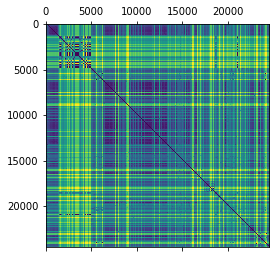

In [79]:
plt.matshow(prescriber_dist)

In [80]:
prescriber_specialty_generic_df.iloc[6828,0:4]

npi                           1245231406
specialty_description    Family Practice
total_claim_count                   2096
drug_count                            81
Name: 6828, dtype: object

In [81]:
providers_sorted = np.lexsort((prescriber_dist[:,6828].tolist(),))

In [82]:
# The prescriber referenced at position 17368 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[6828,:]
np.sort(prescriber_dist[6828])[providers_sorted[0:16]]

array([0.26335122, 0.26273908, 0.3358821 , 0.30168441, 0.30171206,
       0.25461947, 0.2818493 , 0.27790163, 0.36985834, 0.28301254,
       0.36075887, 0.30603744, 0.41013181, 0.29414149, 0.44132466,
       0.36006029])

In [83]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[11455,:])

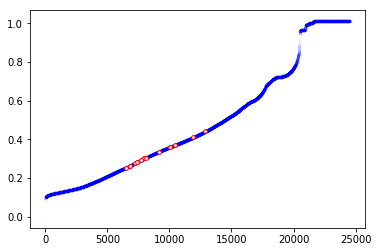

In [84]:
dis_range = np.arange(prescriber_dist.shape[0])
#plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[11455,:]))
plt.scatter(dis_range,np.sort(prescriber_dist[6828,:]), color='blue', alpha=0.01, s=7)
plt.scatter(dis_range[providers_sorted[0:16]],np.sort(prescriber_dist[6828])[providers_sorted[0:16]], color='white', alpha=1, s=14, edgecolor='red')

In [85]:
#providers_sorted = np.lexsort((prescriber_dist[:,6828].tolist(),))

In [86]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:16],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1245231406, 'Family Practice'],
       [1235163817, 'Family Practice'],
       [1447453329, 'Geriatric Medicine'],
       [1922001841, 'Family Practice'],
       [1922002765, 'Family Practice'],
       [1063548154, 'Family Practice'],
       [1578542965, 'Family Practice'],
       [1518920552, 'Family Practice'],
       [1194751891, 'Internal Medicine'],
       [1588723746, 'Family Practice'],
       [1093722480, 'Internal Medicine'],
       [1992734974, 'Family Practice'],
       [1639120462, 'Internal Medicine'],
       [1790909760, 'Family Practice'],
       [1891803318, 'Internal Medicine'],
       [1083665558, 'Internal Medicine']], dtype=object)

In [87]:
np.lexsort(((-1 * pf_matrix[6828,:]).tolist(),))[0:17]

array([  43,   88,  853,  936, 1179,   55, 1205,  705,  832, 1004, 1027,
        852,  825,  497,   56,  671,  672], dtype=int64)

In [88]:
generic_array[np.lexsort(((-1 * pf_matrix[6828,:]).tolist(),))][0:16]

Index(['ALPRAZOLAM', 'ATORVASTATIN CALCIUM', 'OXYCODONE HCL/ACETAMINOPHEN',
       'PRAVASTATIN SODIUM', 'VALSARTAN/HYDROCHLOROTHIAZIDE',
       'AMLODIPINE BESYLATE', 'ZOLPIDEM TARTRATE', 'METFORMIN HCL',
       'OMEPRAZOLE', 'ROSUVASTATIN CALCIUM', 'SIMVASTATIN', 'OXYCODONE HCL',
       'OLMESARTAN/HYDROCHLOROTHIAZIDE', 'GABAPENTIN',
       'AMLODIPINE BESYLATE/BENAZEPRIL', 'LOSARTAN POTASSIUM'],
      dtype='object')

In [89]:
part_d_df_small[part_d_df_small["npi"]==1245231406].sort_values("total_claim_count", ascending=False)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded,drug_count
2071221,1245231406,SADDLE BROOK,NJ,Family Practice,S,ALPRAZOLAM,ALPRAZOLAM,25.0,107,3406,916.82,NaN,63.0,1906.0,558.78,1,1
22181208,1245231406,SADDLE BROOK,NJ,Family Practice,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,30.0,106,7589,1868.88,NaN,92.0,6809.0,1722.08,1,1
7796076,1245231406,SADDLE BROOK,NJ,Family Practice,S,OXYCODONE-ACETAMINOPHEN,OXYCODONE HCL/ACETAMINOPHEN,13.0,95,2288,6325.85,NaN,31.0,733.0,1079.23,1,1
13815435,1245231406,SADDLE BROOK,NJ,Family Practice,S,PRAVASTATIN SODIUM,PRAVASTATIN SODIUM,24.0,90,6412,2872.72,NaN,NaN,NaN,NaN,1,1
8258453,1245231406,SADDLE BROOK,NJ,Family Practice,S,VALSARTAN-HYDROCHLOROTHIAZIDE,VALSARTAN/HYDROCHLOROTHIAZIDE,19.0,75,5218,2289.88,NaN,55.0,4078.0,1681.72,1,1
18143928,1245231406,SADDLE BROOK,NJ,Family Practice,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,21.0,67,5350,597.35,NaN,NaN,NaN,NaN,1,1
14841935,1245231406,SADDLE BROOK,NJ,Family Practice,S,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE,12.0,59,1750,470.28,NaN,24.0,700.0,135.52,1,1
23719477,1245231406,SADDLE BROOK,NJ,Family Practice,S,METFORMIN HCL,METFORMIN HCL,17.0,45,3555,413.76,NaN,NaN,NaN,NaN,1,1
4033853,1245231406,SADDLE BROOK,NJ,Family Practice,S,OMEPRAZOLE,OMEPRAZOLE,13.0,41,2760,737.42,NaN,28.0,2250.0,454.53,1,1
17749794,1245231406,SADDLE BROOK,NJ,Family Practice,S,SIMVASTATIN,SIMVASTATIN,14.0,40,3328,600.97,NaN,NaN,NaN,NaN,1,1
